# Visualization and PCA of South Africa Heart Disease Dataset

## Loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, plot, title, legend, xlabel, ylabel, show

In [171]:
df = pd.read_csv(r"C:\Users\Owner\Desktop\on campis\SAheart.data.txt", index_col = 'row.names')


In [172]:
df.head(20)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
6,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
7,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
8,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
9,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0


In [174]:
df.shape

(462, 10)

#### Description of variables including type, NaN values count, count, mean, standard deviance, maximum and minimum value, as well as quartiles.

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 1 to 463
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 39.7+ KB


In [175]:
df.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


#### Change string variables to integers for the creation of arrays

In [179]:
df = df.replace('Present',0)
df = df.replace('Absent',1)

df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,0,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,1,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,0,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,0,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,0,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
459,214,0.40,5.98,31.72,1,64,28.45,0.00,58,0
460,182,4.20,4.41,32.10,1,52,28.61,18.72,52,1
461,108,3.00,1.59,15.23,1,40,20.09,26.64,55,0


#### Check for outliers

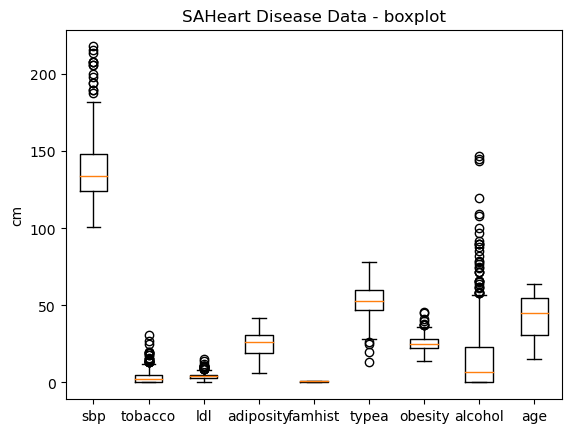

In [187]:

from matplotlib.pyplot import boxplot, xticks, ylabel, title, show

boxplot(X)
xticks(range(1,10),attributeNames)
ylabel('cm')
title('SAHeart Disease Data - boxplot')
show()

## Create matrix with values

In [180]:
raw_data = df.values  
raw_data

array([[1.600e+02, 1.200e+01, 5.730e+00, ..., 9.720e+01, 5.200e+01,
        1.000e+00],
       [1.440e+02, 1.000e-02, 4.410e+00, ..., 2.060e+00, 6.300e+01,
        1.000e+00],
       [1.180e+02, 8.000e-02, 3.480e+00, ..., 3.810e+00, 4.600e+01,
        0.000e+00],
       ...,
       [1.080e+02, 3.000e+00, 1.590e+00, ..., 2.664e+01, 5.500e+01,
        0.000e+00],
       [1.180e+02, 5.400e+00, 1.161e+01, ..., 2.397e+01, 4.000e+01,
        0.000e+00],
       [1.320e+02, 0.000e+00, 4.820e+00, ..., 0.000e+00, 4.600e+01,
        1.000e+00]])

In [181]:
cols = range(0, 9) 
X = raw_data[:, cols]
X = np.asarray(X, dtype = np.intc)
X

array([[160,  12,   5, ...,  25,  97,  52],
       [144,   0,   4, ...,  28,   2,  63],
       [118,   0,   3, ...,  29,   3,  46],
       ...,
       [108,   3,   1, ...,  20,  26,  55],
       [118,   5,  11, ...,  27,  23,  40],
       [132,   0,   4, ...,  14,   0,  46]], dtype=int32)

In [182]:
attributeNames = np.asarray(df.columns[cols])
attributeNames

array(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age'], dtype=object)

In [183]:
classLabels = raw_data[:,-1] # -1 takes the last column
classLabels

array([1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0.

In [184]:
# Then determine which classes are in the data by finding the set of 
# unique class labels 
classNames = sorted(set(classLabels))
classNames


[0.0, 1.0]

In [185]:
# We can assign each type of Iris class with a number by making a
# Python dictionary as so:
classDict = dict(zip(classNames,range(len(classNames))))

classDict

{0.0: 0, 1.0: 1}

In [186]:
y = np.array([classDict[cl] for cl in classLabels])
N, M = X.shape
C = len(classNames)

## PCA

#### Scree plot

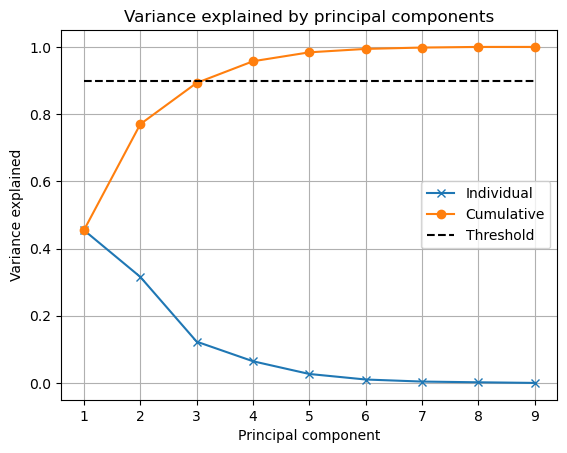

In [212]:
import matplotlib.pyplot as plt
from scipy.linalg import svd

# Subtract mean value from data
Y = X - np.ones((N,1))*X.mean(axis=0)
Y = np.asarray(Y, dtype = np.intc)

# PCA by computing SVD of Y
U,S,V = svd(Y,full_matrices=False)

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()


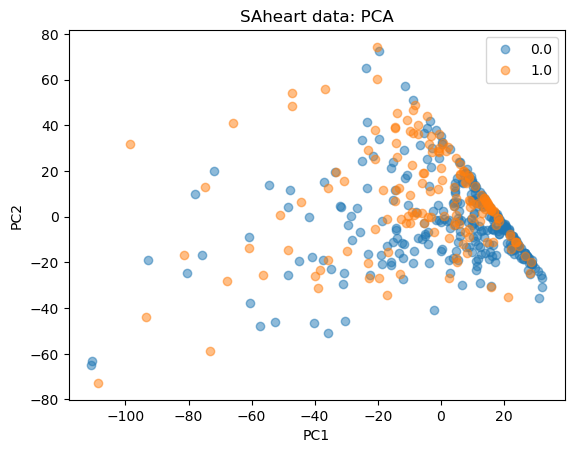

In [213]:
# PCA by computing SVD of Y
U,S,Vh = svd(Y,full_matrices=False)
# scipy.linalg.svd returns "Vh", which is the Hermitian (transpose)
# of the vector V. So, for us to obtain the correct V, we transpose:
V = Vh.T    

# Project the centered data onto principal component space
Z = Y @ V

# Indices of the principal components to be plotted
i = 0
j = 1

# Plot PCA of the data
f = figure()
title('SAheart data: PCA')
#Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c
    plot(Z[class_mask,i], Z[class_mask,j], 'o', alpha=.5)
legend(classNames)
xlabel('PC{0}'.format(i+1))
ylabel('PC{0}'.format(j+1))

# Output result to screen
show()


#### Component coefficients 

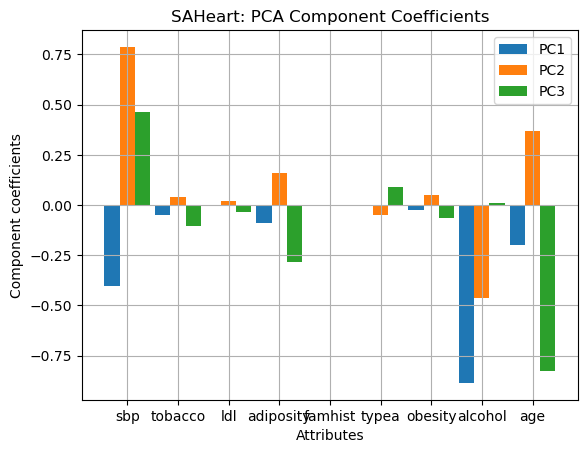

In [228]:
U,S,Vh = svd(Y,full_matrices=False)
V=Vh.T
N,M = X.shape

# We saw in 2.1.3 that the first 3 components explaiend more than 90
# percent of the variance. Let's look at their coefficients:
pcs = [0,1,2]
legendStrs = ['PC'+str(e+1) for e in pcs]
c = ['r','g','b']
bw = .3
r = np.arange(1,M+1)
for i in pcs:    
    plt.bar(r+i*bw, V[:,i], width=bw)
plt.xticks(r+bw, attributeNames)
plt.xlabel('Attributes')
plt.ylabel('Component coefficients')
plt.legend(legendStrs)
plt.grid()
plt.title('SAHeart: PCA Component Coefficients')
plt.show()


In [229]:

pcs = [0,1,2]
for i in pcs:
    print('PC',i+1)
    print(V[:,i])

PC 1
[-4.05467456e-01 -4.99332923e-02 -4.33822325e-03 -8.92188277e-02
  1.08420217e-19 -1.03309177e-03 -2.57074859e-02 -8.86057140e-01
 -1.98405622e-01]
PC 2
[ 0.78753609  0.037787    0.01997402  0.15836762  0.         -0.05133517
  0.04947829 -0.46200656  0.36653283]
PC 3
[ 4.62516947e-01 -1.02231988e-01 -3.31864416e-02 -2.82673127e-01
  8.67361738e-19  9.09991032e-02 -6.53004980e-02  9.44181942e-03
 -8.25825114e-01]


#### Classes projections onto components

In [230]:

all_negative_data = Y[y==0,:]


pcs = [0,1,2]

for i in pcs:
    print('Negative observation PC',i+1)
    print(all_negative_data[i,:])
    print(' ')
    print('Projection negative PC', i+1)
    print(all_negative_data[i,:]@V[:,i])
    print(' ')

Negative observation PC 1
[-20  -3  -1   7   0  -1   3 -13   3]
 
Projection negative PC 1
18.486392021898233
 
Negative observation PC 2
[-6  2  1 11  0  8  4 -2  2]
 
Projection negative PC 2
-1.4433141857208174
 
Negative observation PC 3
[  3   0  -1  -8   0   5  -5 -14  -4]
 
Projection negative PC 3
7.634735282743502
 


In [231]:

pcs = [0,1,2]

# Projection and observation of present class
all_positive_data = Y[y==1,:]

for i in pcs:
    print('Positive observation PC',i+1)
    print(all_positive_data[i,:])
    print(' ')
    print('Projection positive PC', i+1)
    print(all_positive_data[i,:]@V[:,i])
    print(' ')

Positive observation PC 1
[21  8  0 -1  0 -4  0 80  9]
 
Projection positive PC 1
-81.491153551126
 
Positive observation PC 2
[  5  -3   0   3   0   1   2 -14  20]
 
Projection positive PC 2
18.145792233414742
 
Positive observation PC 3
[31  3  1 13  0 -2  5  7 15]
 
Projection positive PC 3
-2.506392363862125
 


#### Graph of each variable's standard deviations

Text(0.5, 1.0, 'SAHeart: attribute standard deviations')

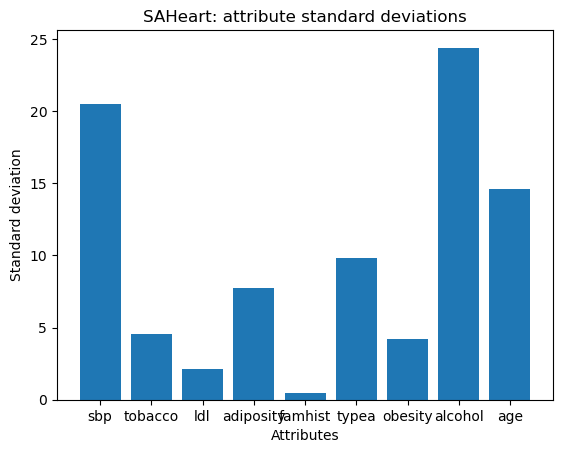

In [198]:
import matplotlib.pyplot as plt
from scipy.linalg import svd

r = np.arange(1,X.shape[1]+1)
plt.bar(r, np.std(X,0))
plt.xticks(r, attributeNames)
plt.ylabel('Standard deviation')
plt.xlabel('Attributes')
plt.title('SAHeart: attribute standard deviations')


## PCA with standardized dataset

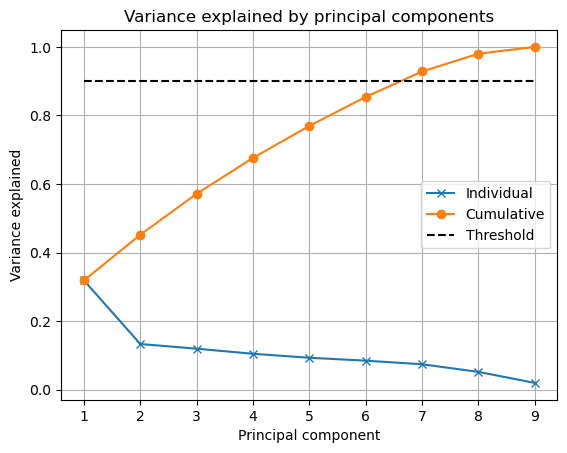

In [232]:
# Subtract the mean from the data and divide by the attribute standard
# deviation to obtain a standardized dataset:
Y2 = X - np.ones((N, 1))*X.mean(0)
Y2 = Y2*(1/np.std(Y2,0))
# Here were utilizing the broadcasting of a row vector to fit the dimensions 
# of Y2

U,S,Vh = svd(Y2,full_matrices=False)
V2=Vh.T
N2,M2 = X.shape

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()

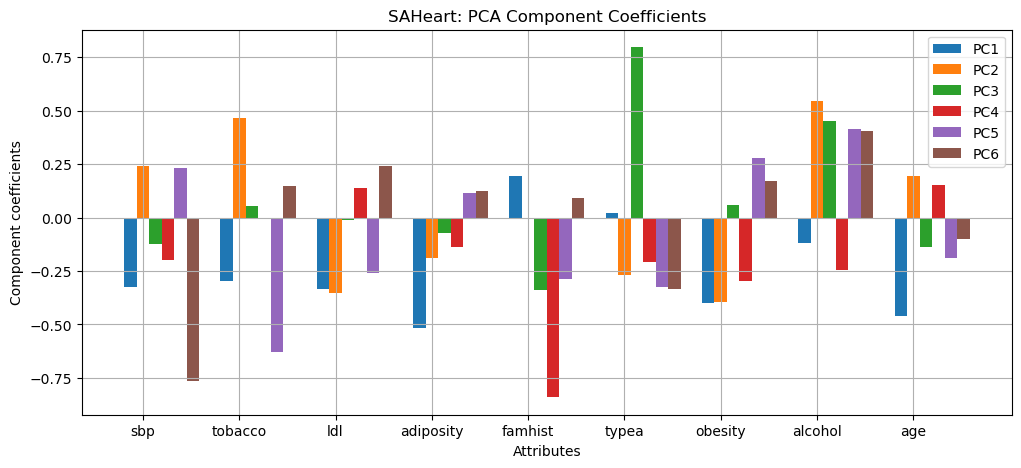

In [240]:


# We saw in 2.1.3 that the first 3 components explaiend more than 90
# percent of the variance. Let's look at their coefficients:
pcs = [0,1,2,3,4,5]
legendStrs = ['PC'+str(e+1) for e in pcs]
c = ['r','g','b']
bw = .13
r = np.arange(1,M2+1)
plt.figure(figsize=(12,5))

for i in pcs:
    plt.subplot()
    plt.bar(r+i*bw, V2[:,i], width=bw)
plt.xticks(r+bw, attributeNames)
plt.xlabel('Attributes')
plt.ylabel('Component coefficients')
plt.legend(legendStrs)
plt.grid()
plt.title('SAHeart: PCA Component Coefficients')
plt.show()

In [237]:
pcs = [0,1,2,3,4,5]
for i in pcs:
    print('PC',i+1)
    print(V2[:,i])

PC 1
[-0.32515572 -0.29679111 -0.3350829  -0.51744732  0.19579801  0.01980828
 -0.40122777 -0.11961268 -0.46058264]
PC 2
[ 0.24039188  0.46500387 -0.35405988 -0.19050686 -0.00257373 -0.26737564
 -0.39544085  0.54735383  0.19200479]
PC 3
[-0.12242603  0.05454167 -0.01107307 -0.07353514 -0.33720033  0.79656035
  0.06002309  0.45371085 -0.13725262]
PC 4
[-0.19986942 -0.00226562  0.1398819  -0.13739481 -0.84038687 -0.20991237
 -0.29848031 -0.24308671  0.15201271]
PC 5
[ 0.23030393 -0.62806844 -0.25812766  0.11658561 -0.28681415 -0.3248816
  0.27938318  0.41369569 -0.18777257]
PC 6
[-0.76268467  0.14785984  0.24239452  0.12390782  0.08942369 -0.33498305
  0.16939436  0.40395795 -0.10126501]


In [238]:
# Projection and observation of absent class
all_negative_data = Y2[y==0,:]

for i in pcs:
    print('Negative observation PC',i+1)
    print(all_negative_data[i,:])
    print(' ')
    print('Projection Negative PC', i+1)
    print(all_negative_data[i,:]@V2[:,i])
    print(' ')

Negative observation PC 1
[-0.99280637 -0.73592703 -0.58252015  0.9116801  -1.18585412 -0.11256317
  0.81709446 -0.56138757  0.21818356]
 
Projection Negative PC 1
-0.3309216504091384
 
Negative observation PC 2
[-0.3090164   0.58019537  0.82650765  1.42627534 -1.18585412  0.9071267
  1.05466377 -0.11025354  0.1496582 ]
 
Projection Negative PC 2
-1.0570016321396427
 
Negative observation PC 3
[ 0.17940501  0.14148791 -0.58252015 -1.14670087  0.84327404  0.60121974
 -1.32102936 -0.60239976 -0.33001932]
 
Projection Negative PC 3
-0.036229804075974315
 
Negative observation PC 4
[-1.18817494 -0.73592703 -0.58252015 -0.76075444 -1.18585412 -0.41847013
 -0.37075211 -0.60239976 -0.94674757]
 
Projection Negative PC 4
1.4597850634610399
 
Negative observation PC 5
[-0.99280637 -0.73592703 -1.52187203 -1.91859373  0.84327404  0.60121974
 -1.08346005 -0.68442413 -1.7690519 ]
 
Projection Negative PC 5
-0.288130401840477
 
Negative observation PC 6
[-0.3090164  -0.73592703 -1.52187203 -1.01805

In [239]:
# Projection and observation of present class
all_positive_data = Y2[y==1,:]

for i in pcs:
    print('Positive observation PC',i+1)
    print(all_positive_data[i,:])
    print(' ')
    print('Projection positive PC', i+1)
    print(all_positive_data[i,:]@V2[:,i])
    print(' ')

Positive observation PC 1
[ 1.05856354  1.89631778  0.35683172 -0.2461592  -1.18585412 -0.41847013
 -0.1331828   3.29375784  0.62933573]
 
Projection positive PC 1
-1.7700787625087326
 
Positive observation PC 2
[ 0.27708929 -0.73592703 -0.11284422  0.39708486  0.84327404  0.19334379
  0.57952514 -0.60239976  1.3831147 ]
 
Projection positive PC 2
-0.6584875465166402
 
Positive observation PC 3
[ 1.54698495  0.79954911  0.82650765  1.68357296 -1.18585412 -0.21453216
  1.29223308  0.29986832  1.04048789]
 
Projection positive PC 3
0.021054017788524754
 
Positive observation PC 4
[-0.21133212  2.11567151 -0.58252015  0.26843605 -1.18585412  0.70318873
 -0.1331828   1.65327043  0.42375964]
 
Projection positive PC 4
0.4703292272987059
 
Positive observation PC 5
[-1.18817494  0.14148791 -0.11284422 -1.40399849 -1.18585412  0.9071267
 -0.60832142 -0.43835102  1.04048789]
 
Projection positive PC 5
-0.9983260807297992
 
Positive observation PC 6
[-0.3090164  -0.73592703  0.35683172  0.65438

## Visualization of dataset

#### Distribution of variables

In [205]:
import pandas as pd

#### Non-stardardized data

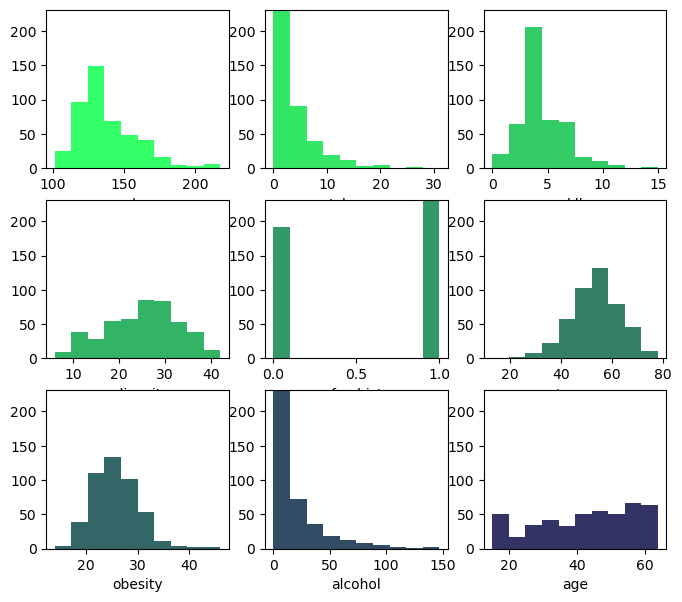

In [222]:

from matplotlib.pyplot import figure, subplot, hist, xlabel, ylim, show
import numpy as np


figure(figsize=(8,7))
u = int(np.floor(np.sqrt(M))); v = int(np.ceil(float(M)/u))
for i in range(M):
    subplot(u,v,i+1)
    hist(X[:,i], color=(0.2, 1-i*0.1, 0.4))
    xlabel(attributeNames[i])
    ylim(0,N/2)
    
show()


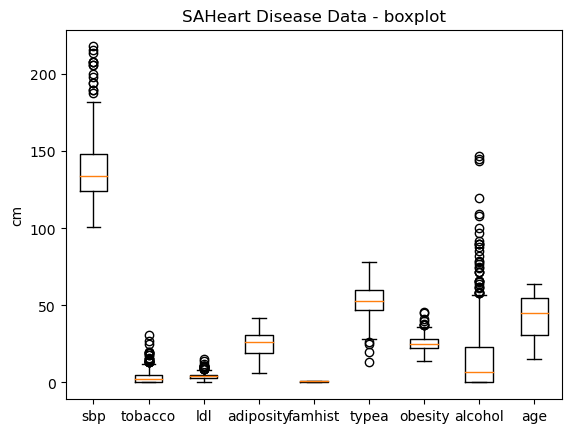

In [207]:

from matplotlib.pyplot import boxplot, xticks, ylabel, title, show

boxplot(X)
xticks(range(1,10),attributeNames)
ylabel('cm')
title('SAHeart Disease Data - boxplot')
show()



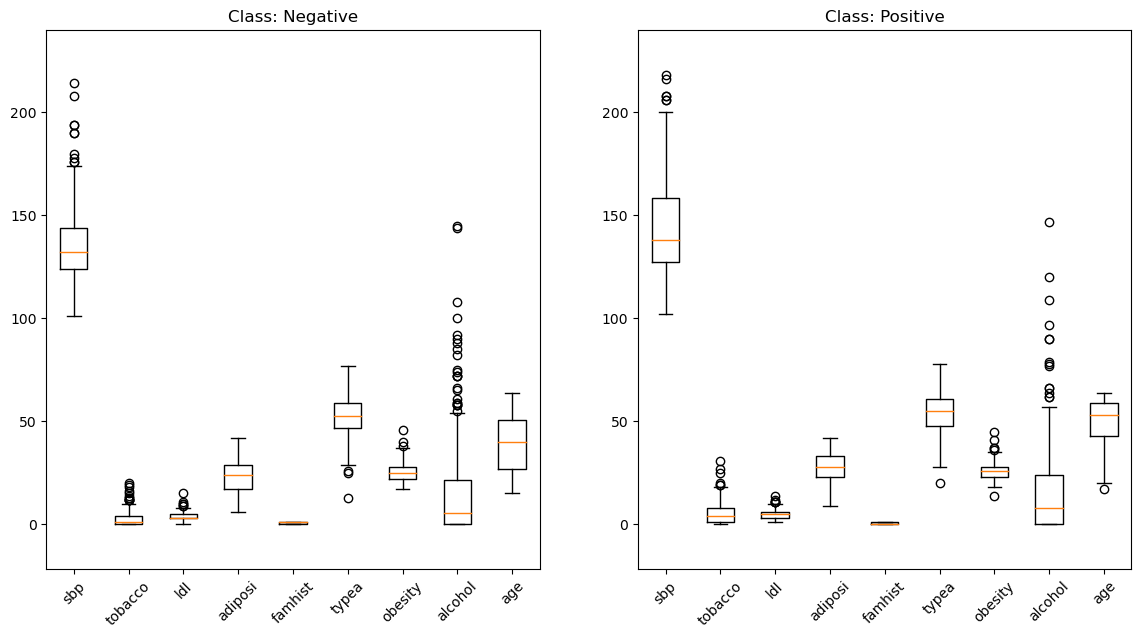

In [209]:

from matplotlib.pyplot import (figure, subplot, boxplot, title, xticks, ylim, 
                               show)

classNamesp= ['Negative','Positive']

figure(figsize=(14,7))
for c in range(C):
    subplot(1,C,c+1)
    class_mask = (y==c) 
    
    boxplot(X[class_mask,:])
    #title('Class: {0}'.format(classNames[c]))
    title('Class: '+classNamesp[c])
    xticks(range(1,len(attributeNames)+1), [a[:7] for a in attributeNames], rotation=45)
    y_up = X.max()+(X.max()-X.min())*0.1; y_down = X.min()-(X.max()-X.min())*0.1
    ylim(y_down, y_up)

show()


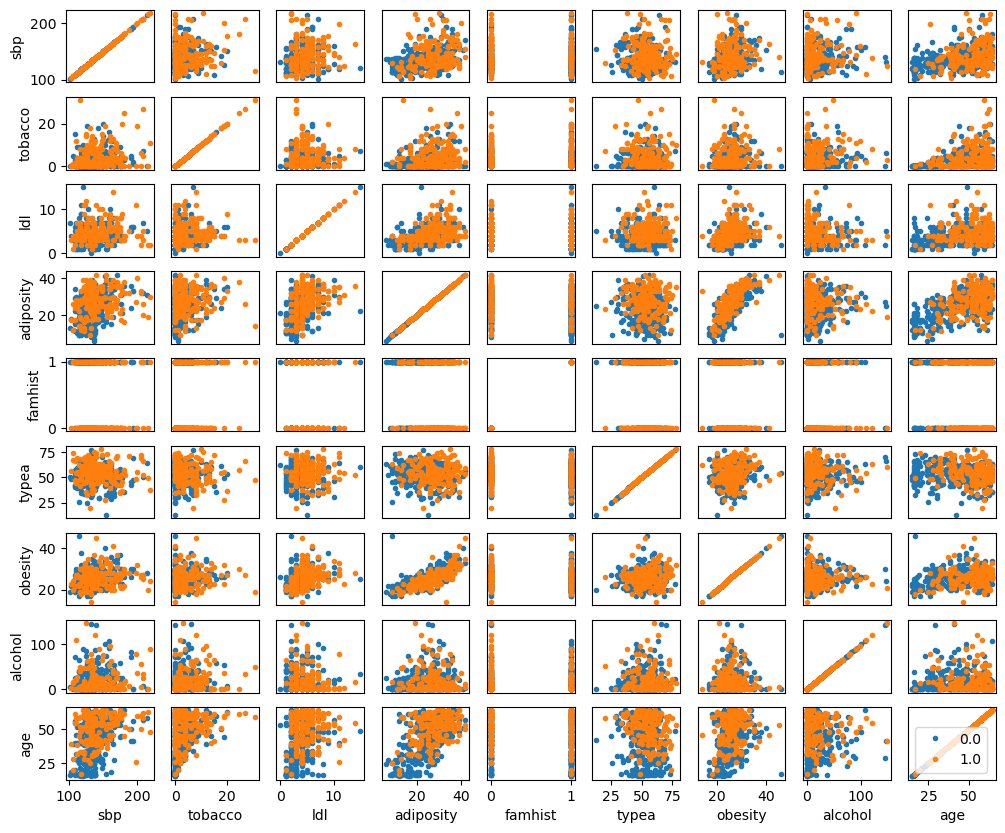

In [210]:
from matplotlib.pyplot import (figure, subplot, plot, xlabel, ylabel, 
                               xticks, yticks,legend,show)


figure(figsize=(12,10))
for m1 in range(M):
    for m2 in range(M):
        subplot(M, M, m1*M + m2 + 1)
        for c in range(C):
            class_mask = (y==c)
            plot(np.array(X[class_mask,m2]), np.array(X[class_mask,m1]), '.')
            if m1==M-1:
                xlabel(attributeNames[m2])
            else:
                xticks([])
            if m2==0:
                ylabel(attributeNames[m1])
            else:
                yticks([])
            #ylim(0,X.max()*1.1)
            #xlim(0,X.max()*1.1)
legend(classNames)

show()

